# Лабораторная работа №9 по вычислительной математике
## Применение метода прогонки для решения краевой задачи с переменными кусочно-гладкими коэффициентами
### Выполнил Филиппенко Павел -- студент группы Б01-009

Задание -- Демченко Лабораторная работа №4 Вариант 3 Задание 16

In [48]:
import numpy as np
import matplotlib.pyplot as plt

Необходимо решить уравнение с кусочно-непрерывными коэффициентами.
$$
\begin{cases} 
\frac{d}{dx}[k(x)\frac{du}{dx}] - q(x)u = -f(x), \\
u(0) = u^0, \\
u(1) = u^1, \\
\end{cases} 
$$

В данной задаче коэффициенты имеют одну точку разрыва 1 рода 
в координате $x_0 = \frac{1}{\sqrt{3}}$. В данной точке ставятся так называемые условия сопряжения:

$$
\begin{cases}
u |_{x = x_0 - 0} = u |_{x = x_0 + 0}, \\
ku_x |_{x = x_0 - 0} = ku_x |_{x = x_0 + 0}. 
\end{cases}
$$

In [49]:
x0 = 1 / np.sqrt(3)

def k(x):
    return np.exp(-x)

def q(x):
    if (x < x0):
        return x**3
    else:
        return x
    
def f(x):
    if (x < x0):
        return x**2 - 1
    else:
        return 1

Несколько очевидных утверждений, которые важны для понимания программы:
- Если на отрезке находится $L$ точек (включая концевые точки), то они делят отрезок на $L-1$ сегментов
- Длина каждого сегмента при этом $h = (x_L - x_0)/(L-1)$
- Нумерация точек на отрезке начинается с 0. В таком случае, индекс первой точки 0, индекс последней точки $L-1$
- Кроме того, индекс второй точки 1, индекс предпоследней точки $L-2$

In [50]:
# начальная и конечная координаты
x_start = 0
x_end = 1
# краевые условия
u_0 = 2
u_L = 1

L = 100000 # количество точек на разностной схеме
h = (x_end - x_start) / (L-1) # шаг разностной схемы

# пространственный диапазон точек
x = np.linspace(x_start, x_end, L)
# будущее решение задачи
u = np.zeros(L)
# задаем краевые условия
u[0] = u_0
u[-1] = u_L

Для решения данной задачи будем использовать метод встречных прогонок.

Пусть точка разрыва расположена на сетке между узлами $l_\alpha$ и $l_\beta$. Введем обозначения:
- $(k_\alpha)_{l \pm 1/2} = k_\alpha(x_l \pm h/2)$
- $(k_\beta)_{l \pm 1/2} = k_\beta(x_l \pm h/2)$
- $(q_\alpha)_l = q_\alpha(x_l)$
- $(q_\beta)_l = q_\beta(x_l)$
- $(f_\alpha)_l = f_\alpha(x_l)$
- $(f_\beta)_l = f_\beta(x_l)$

Разностная схема (в данном случае для участнов до и после точки разрыва имеет различный вид)
$$
\left(\frac{d}{dx}\left[k(x)\frac{du}{dx}\right]\right)_{x = x_l} \approx \frac{(k_\alpha)_{l+1/2}\displaystyle\frac{u_{l+1} - u_l}{h} - (k_\alpha)_{l-1/2}\displaystyle\frac{u_{l} - u_{l-1}}{h}}{h}, \;\;\; l = \overline{1 \div l_\alpha - 1}
$$

$$
\left(\frac{d}{dx}\left[k(x)\frac{du}{dx}\right]\right)_{x = x_l} \approx \frac{(k_\beta)_{l+1/2}\displaystyle\frac{u_{l+1} - u_l}{h} - (k_\beta)_{l-1/2}\displaystyle\frac{u_{l} - u_{l-1}}{h}}{h}, \;\;\; l = \overline{l_\beta + 1 \div L - 1}
$$

Подставляя разностную схему в уравнение, получим систему из $L - 3$ уравнений на $L + 1$ неизвестных
$$
\begin{cases}
\displaystyle\frac{(k_\alpha)_{l+1/2}(u_{l+1} - u_l) - (k_\alpha)_{l-1/2}(u_{l} - u_{l-1})}{h^2} - (q_\alpha)_l u_l = -(f_\alpha)_l, \;\;\; l = \overline{1 \div l_\alpha - 1}, \\
\displaystyle\frac{(k_\beta)_{l+1/2}(u_{l+1} - u_l) - (k_\beta)_{l-1/2}(u_{l} - u_{l-1})}{h^2} - (q_\beta)_l u_l = -(f_\beta)_l, \;\;\; l = \overline{l_\beta + 1 \div L - 1}.
\end{cases}
$$

К этой системе добавим краевые условия и условия сопряжения в точке разрыва и получим систему из $L + 1$ 
уравнений на $L + 1$ неизвестных. Перегруппируем слагаемые в уравнениях -- приведем подобные
при $u_{l+1}$, $u_l$, $u_{l-1}$. Коэффициенты при этих слагаемых обозначим соответственно $a_l$, 
$b_l$, $c_l$. Слагаемые в правых частях обозначим $d_l$. Тогда, формулы для данных коэффициентов
примут следующий вид

$$
\begin{cases}
a_l = (k_\alpha)_{l + 1/2} \\
b_l = -\left[(k_\alpha)_{l + 1/2} + (k_\alpha)_{l - 1/2} + (q_\alpha)_l h^2 \right] \\
c_l = (k_\alpha)_{l - 1/2} \\
d_l = -(f_\alpha)_l h^2 \\
\end{cases}
\hspace{25mm} l = \overline{1 \div l_\alpha - 1}
$$

$$
\begin{cases}
a_l = (k_\beta)_{l + 1/2} \\
b_l = -\left[(k_\beta)_{l + 1/2} + (k_\beta)_{l - 1/2} + (q_\beta)_l h^2\right] \\
c_l = (k_\beta)_{l - 1/2} \\
d_l = -(f_\beta)_l h^2 \\
\end{cases}
\hspace{25mm} l = \overline{l_\beta + 1 \div L - 1}
$$

Далее будем называть эти коэффициенты коэффициентами приведенного уравнения.

Приведенная система имеет вид

$$
\begin{cases}
u_0 = u^0, \\
a_l u_{l+1} + b_l u_l + c_l u_{l - 1} = d_l, \;\;\;\;\;\;\;\;\;\; \overline{1 \div l_\alpha - 1}, \\
u_{l_\alpha} = u_{l_\beta}, \\
(k_\alpha)_{l_\alpha}(u_{l_\alpha} - u_{l_\alpha - 1}) = (k_\beta)_{l_\beta}(u_{l_\beta + 1} - u_{l_\beta}), \\
a_l u_{l+1} + b_l u_l + c_l u_{l - 1} = d_l, \;\;\;\;\;\;\;\;\;\; \overline{l_\beta + 1 \div L - 1}, \\
u_L = u^1.
\end{cases}
$$

Приступаем к решению. Сначала делаем прямую прогонку. Из первого уравнения подставим $u_0$ во второе и из последнего $u_L$ в предпоследнее:

$$
\begin{cases}
u_1 	\;\;\;\,  = \;\;\;  -\frac{a_1}{b_1} u_2 \;\;\; + \frac{d_1 - c_1 u_0}{b_1} \;\;\;\;\;\;\, = \alpha_1 u_2 + \beta_1, \\
u_{L - 1} = -\frac{c_{L - 1}}{b_{L - 1}}u_{L - 2} + \frac{d_{L - 1} - c_{L - 1} u_L}{b_{L - 1}} = \alpha_{L - 1} u_{L - 2} + \beta_{L - 1}
\end{cases}
$$

Рекурсивно выражая $u_{l-1}$ и $u_{l+1}$ через прогоночные коэффициенты $\alpha_l$ и $\beta_l$
сведем исходную систему к системе с двудиагональной матрицей
$$
\begin{cases}
u_{l - 1} = \alpha_{l - 1} u_l + \beta_{l - 1}, \;\;\; l = \overline{1 \div l_\alpha - 1} \\
u_{l + 1} = \alpha_{l + 1} u_l + \beta_{l + 1}, \;\;\; l = \overline{L - 1 \div l_\beta + 1}
\end{cases}
$$

Формулы для прогоночных коэффициентов:
$$
\begin{cases}
\alpha_l = -\displaystyle\frac{a_l}{b_l + c_l \alpha_{l-1}} \\
\beta_l  =  \displaystyle\frac{d_l - c_l \beta_{l-1}}{b_l + c_l \alpha_{l - 1}}
\end{cases}
l = \overline{2 \div l_\alpha - 1}
$$

$$
\begin{cases}
\alpha_l = -\displaystyle\frac{c_l}{b_l + a_l \alpha_{l+1}} \\
\beta_l  =  \displaystyle\frac{d_l - a_l \beta_{l+1}}{b_l + a_l \alpha_{l + 1}}
\end{cases}
l = \overline{L - 2 \div l_\beta + 1}
$$

Рассмотрим отдельно систему из уравнений с индексами $l_{\alpha} - 1$, $l_\alpha$, $l_\beta$ и $l_{\beta} + 1$.

\begin{cases}
u_{l_\alpha - 1} = \alpha_{l_\alpha - 1} u_{l_\alpha} + \beta_{l_\alpha - 1} \\
u_{l_\alpha} = u_{l_\beta} \\
(k_\alpha)_{l_\alpha}(u_{l_\alpha} - u_{l_\alpha - 1}) = (k_\beta)_{l_\beta}(u_{l_\beta + 1} - u_{l_\beta}) \\
u_{l_\beta  + 1} = \alpha_{l_\beta  + 1} u_{l_\beta}  + \beta_{l_\beta  + 1}
\end{cases}

Решив эту систему, получим следующий результат:

\begin{cases}
u_{l_\alpha} = u_{l_\beta} = \displaystyle\frac{(k_\alpha)_{l_\alpha}\beta_{l_\alpha - 1} + (k_\beta)_{l_\beta}\beta_{l_\beta + 1}}{(k_\alpha)_{l_\alpha}(1 - \alpha_{l_\alpha - 1}) + (k_\beta)_{l_\beta} (1 - \alpha_{l_\beta + 1})} \\
u_{l_\alpha - 1} = \alpha_{l_\alpha - 1} u_{l_\alpha} + \beta_{l_\alpha - 1} \\
u_{l_\beta + 1} = \alpha_{l_\beta + 1} u_{l_\beta} + \beta_{l_\beta + 1}
\end{cases}

Этим шагом заканчивается прямая прогонка. При обратной прогонке по формулам 
$$
\begin{cases}
u_{l - 1} = \alpha_{l - 1} u_l + \beta_{l - 1}, \;\;\; l = \overline{1 \div l_\alpha - 1} \\
u_{l + 1} = \alpha_{l + 1} u_l + \beta_{l + 1}, \;\;\; l = \overline{L - 1 \div l_\beta + 1}
\end{cases}
$$

находим решение в узлах сетки, получая, таким образом, численое решение задачи.

In [51]:
# находим индексы, окружающие точку разрыва
l_alpha = int(np.floor(x0 / h))
l_beta = l_alpha + 1

In [52]:
# коэффициенты приведенного уравнения
a = np.zeros(L)
b = np.zeros(L)
c = np.zeros(L)
d = np.zeros(L)

# прогоночные коэффициенты
alpha = np.zeros(L)
beta  = np.zeros(L)

In [53]:
# начало прямой прогонки
# l in [1, l_a - 1]
for l in range(1, l_alpha):
    a[l] = k((l + 0.5) * h)
    b[l] = -( k((l + 0.5) * h) + k((l - 0.5) * h) + q(l * h) * h * h )
    c[l] = k((l - 0.5) * h)
    d[l] = -f(l * h) * h * h


# l in [l_b + 1, L - 2]
for l in range(l_beta + 1, L-1):
    a[l] = k((l + 0.5) * h)
    b[l] = -( k((l + 0.5) * h) + k((l - 0.5) * h) + q(l * h) * h * h )
    c[l] = k((l - 0.5) * h)
    d[l] = -f(l * h) * h * h

In [54]:
# прогоночные коэффициенты в первой и предпоследней точках
alpha[1] = -a[1] / b[1]
beta[1]  = (d[1] - c[1] * u_0) / b[1]

alpha[L - 2] = -c[L - 2] / b[L - 2]
beta[L - 2]  = (d[L - 2] - c[L - 2] * u_L) / b[L - 2]

In [55]:
# l in [2, l_a - 1]
for l in range(2, l_alpha):
    alpha[l] = -a[l] / (b[l] + c[l] * alpha[l - 1])
    beta[l]  = (d[l] - c[l] * beta[l - 1]) / (b[l] + c[l] * alpha[l - 1])


# l in [L - 3, l_b + 1]
for l in range(L - 3, l_beta, -1):
    alpha[l] = -c[l] / (b[l] + a[l] * alpha[l + 1])
    beta[l]  = (d[l] - a[l] * beta[l + 1]) / (b[l] + a[l] * alpha[l + 1])

In [56]:
# результат решения системы для индексов l_alpha-1, l_alpha, l_beta, l_beta+1
u[l_alpha] = (k(l_alpha * h) * beta[l_alpha - 1] + k(l_beta * h) * beta[l_beta + 1]) / (k(l_alpha * h) * (1 - alpha[l_alpha - 1]) + k(l_beta * h) * (1 - alpha[l_beta + 1]))
u[l_beta] = u[l_alpha].copy()

u[l_alpha - 1] = alpha[l_alpha - 1] * u[l_alpha] + beta[l_alpha - 1]
u[l_beta + 1] = alpha[l_beta + 1] * u[l_beta] + beta[l_beta + 1]
# конец прямой прогонки

# начало обратной прогонки
for l in range(l_alpha - 1, 0, -1):
    u[l] = alpha[l] * u[l + 1] + beta[l]

for l in range(l_beta + 1, L-1):
    u[l] = alpha[l] * u[l - 1] + beta[l]
# конец обратной прогонки

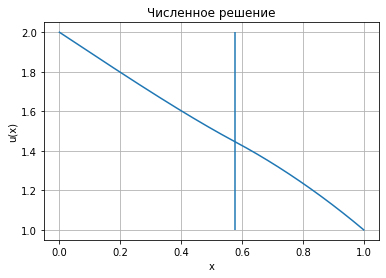

In [57]:
plt.plot(x, u)
plt.title("Численное решение")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid()

plt.vlines(x0, min(u), max(u)) # вертикальная линия в координате точки разрыва

Рассмотрим отдельно область точки разрыва.

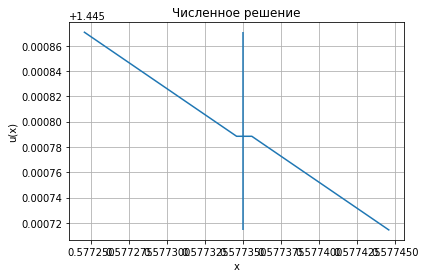

In [58]:
plt.plot(x[l_alpha-10:l_beta+10], u[l_alpha-10:l_beta+10])
plt.title("Численное решение")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid()

plt.vlines(x0, min(u[l_alpha-10:l_beta+10]), max(u[l_alpha-10:l_beta+10])) # вертикальная линия в координате точки разрыва